In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [42]:
df = pd.read_csv("../data/raw/CAR DETAILS FROM CAR DEKHO.csv")

In [43]:
print("\nMissing Values Count:")
print(df.isnull().sum())


Missing Values Count:
name             0
year             4
selling_price    5
km_driven        5
fuel             1
seller_type      2
transmission     2
owner            3
dtype: int64


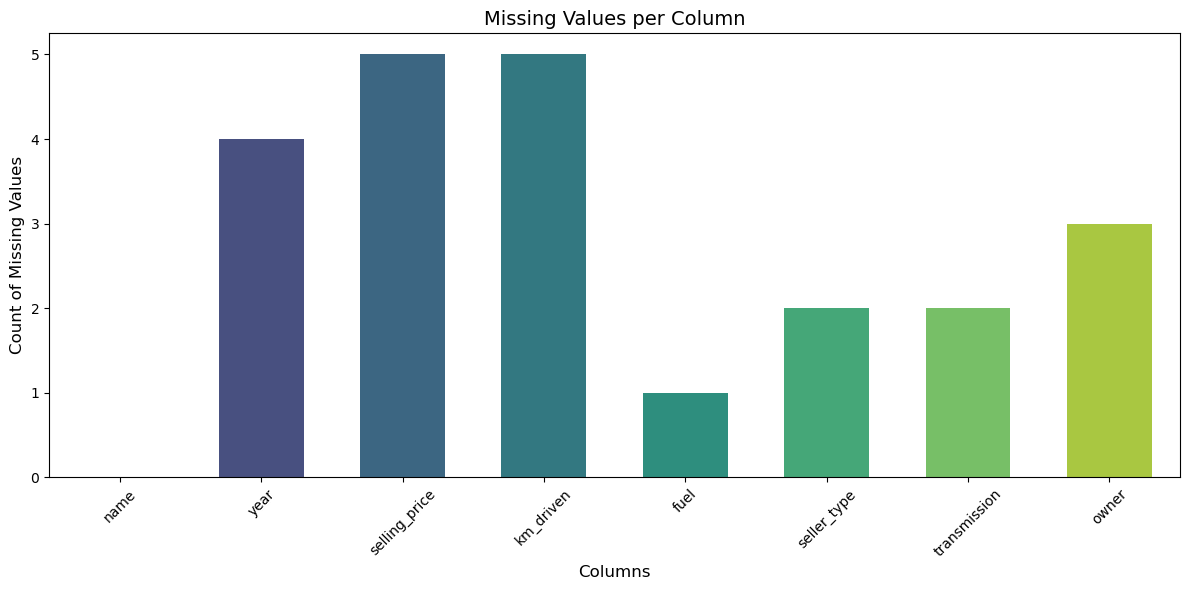

In [44]:
missing_counts = df.isnull().sum()

plt.figure(figsize=(12,6))  # make figure wider
sns.barplot(
    x=missing_counts.index,
    y=missing_counts.values,
    hue=missing_counts.index,
    palette="viridis",
    legend=False,
    width=0.6
)

plt.title("Missing Values per Column", fontsize=14)
plt.ylabel("Count of Missing Values", fontsize=12)
plt.xlabel("Columns", fontsize=12)

plt.xticks(rotation=45, fontsize=10)  # rotate labels
plt.yticks(fontsize=10)

plt.tight_layout()   # adjust spacing
plt.savefig('../results/eda_visualizations/missingValuesBarplot.png')
plt.show()

In [45]:
# Create a copy for imputation
df_imputed = df.copy()

# Numeric columns: fill with mean
for col in df_imputed.select_dtypes(include=[np.number]).columns:
    df_imputed[col] = df_imputed[col].fillna(df_imputed[col].mean())

# Categorical columns: fill with mode
for col in df_imputed.select_dtypes(include=['object']).columns:
    df_imputed[col] = df_imputed[col].fillna(df_imputed[col].mode()[0])

print("After Imputation:")
print(df_imputed.head())
df = df_imputed

After Imputation:
                       name    year  selling_price  km_driven    fuel  \
0             Maruti 800 AC  2007.0   60000.000000    70000.0  Petrol   
1  Maruti Wagon R LXI Minor  2007.0  504355.832295    50000.0  Petrol   
2      Hyundai Verna 1.6 SX  2012.0  600000.000000   100000.0  Diesel   
3    Datsun RediGO T Option  2017.0  250000.000000    46000.0  Petrol   
4     Honda Amaze VX i-DTEC  2014.0  450000.000000   141000.0  Diesel   

  seller_type transmission         owner  
0  Individual       Manual   First Owner  
1  Individual       Manual   First Owner  
2  Individual       Manual   First Owner  
3  Individual       Manual   First Owner  
4  Individual       Manual  Second Owner  


In [46]:
df.shape

(4340, 8)

In [47]:
df.count()

name             4340
year             4340
selling_price    4340
km_driven        4340
fuel             4340
seller_type      4340
transmission     4340
owner            4340
dtype: int64

In [48]:
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (757, 8)


In [49]:
df = df.drop_duplicates()
df.head(5)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007.0,60000.000000,70000.0,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007.0,504355.832295,50000.0,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012.0,600000.000000,100000.0,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017.0,250000.000000,46000.0,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014.0,450000.000000,141000.0,Diesel,Individual,Manual,Second Owner


In [50]:
df.to_csv('../results/outputs/handledMissingValues.csv',index=False)

In [51]:
df.shape

(3583, 8)